In [2]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud,ImageColorGenerator

import matplotlib.pyplot as plt


In [3]:
df = pd.read_pickle('df.pkl')
dtm = pd.read_pickle('dtm.pkl')
df.head()

,show_number,air_date,round,category,value,question,answer,text,Category
0,4680,2004-12-31,Jeopardy!,HISTORY,200,"For the last 8 years of his life, Galileo was ...",Copernicus,"history for the last years of his life, gali...",People
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,espns top all-time athletes no. olympian...,Film & TV
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200,The city of Yuma in this state has a record av...,Arizona,everybody talks about it the city of yuma in t...,U.S. Hodgepodge
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,"the company line in , live on the art linklet...",People
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,epitaphs tributes signer of the dec. of indep...,U.S. Hodgepodge


In [4]:
print("There are {} questions in this dataset. \n".format(df.shape[0]))

print("There are {} meta-categories in this dataset such as {}... \n".format(len(df.Category.unique()),
                                                                           ", ".join(df.Category.str.upper().unique()[0:5])))

print("These represent {} actual Jeopardy categories from {} until {}, such as {}... \n".format(len(df.category.unique()), \
                                                                                                df.air_date.min(), df.air_date.max(), \
                                                                                                ", ".join(df.category.unique()[0:5])))

There are 203493 questions in this dataset. 

There are 13 meta-categories in this dataset such as PEOPLE, FILM & TV, U.S. HODGEPODGE, WORDS, HISTORY... 

These represent 27295 actual Jeopardy categories from 1984-09-10 00:00:00 until 2012-01-27 00:00:00, such as HISTORY, ESPN's TOP 10 ALL-TIME ATHLETES, EVERYBODY TALKS ABOUT IT..., THE COMPANY LINE, EPITAPHS & TRIBUTES... 



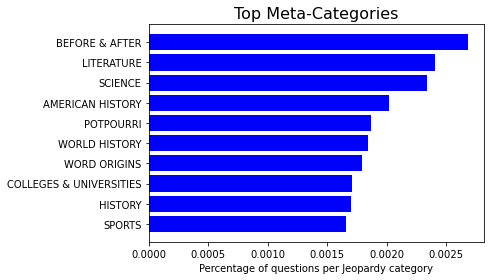

In [11]:
# visualize top Jeopardy categories by question volume
jcategory_freq = df.category.value_counts(normalize=True)[:10].sort_values(ascending=True)
jcategory_freq = pd.DataFrame(jcategory_freq)

x, y = jcategory_freq.index, jcategory_freq.category

plt.barh(x, y, color = 'blue')
plt.title('Top Meta-Categories', fontdict ={'fontsize':16})
plt.xlabel('Percentage of questions per Jeopardy category')
plt.show()


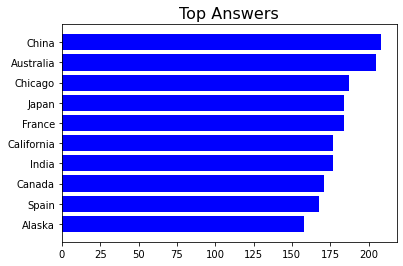

In [9]:
#top 10 answers are places
answers = df['answer'].value_counts()[:10].sort_values(ascending=True)
plt.barh(answers.index, answers.values, color='blue');
plt.title('Top Answers', fontdict ={'fontsize':16});

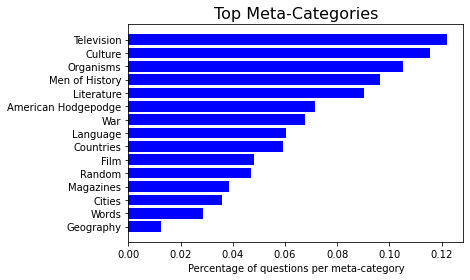

In [5]:
# visualize top meta-categories by question volume
category_freq = df.Category.value_counts(normalize=True, ascending=True)
category_freq = pd.DataFrame(category_freq)

x, y = category_freq.index, category_freq.Category

plt.barh(x, y, color = 'blue')
plt.title('Top Meta-Categories', fontdict ={'fontsize':16})
plt.xlabel('Percentage of questions per meta-category')
plt.show()


In [22]:

#making of word cloud from Product name column
def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wordcloud_list = list(text)
    wordcloud_list = [words for segments in wordcloud_list for words in segments.split() if ((words not in stopwords) * (words != 'one')) ]
    text = " ".join(topic for topic in wordcloud_list)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(background_color="white", width=900, height=500).generate(text)
    plt.axis("off")
    plt.tight_layout(pad=5)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

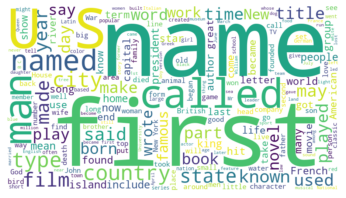

In [23]:
create_wordcloud(df.question)

Topic: Organisms


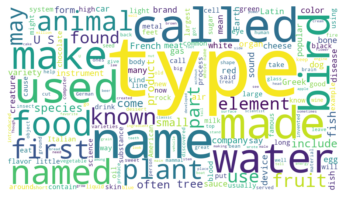

Topic: Cities


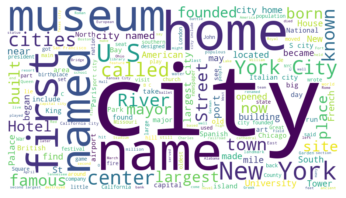

Topic: Countries


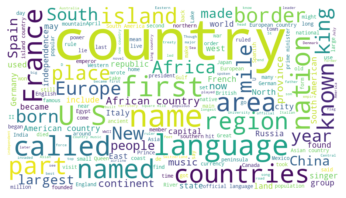

Topic: War


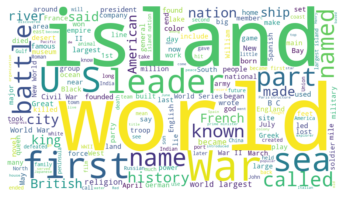

Topic: Culture


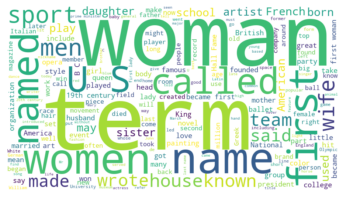

Topic: Television


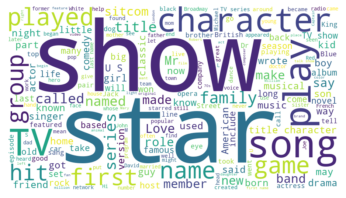

Topic: Film


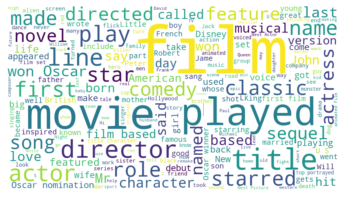

Topic: Men of History


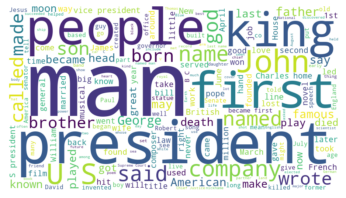

Topic: Literature


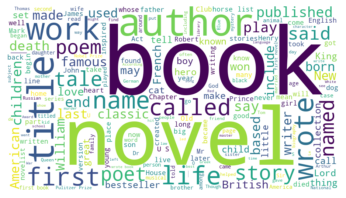

Topic: Language


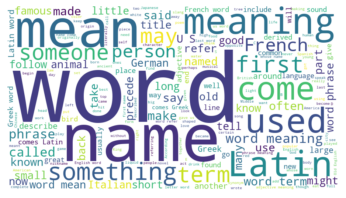

Topic: Magazines


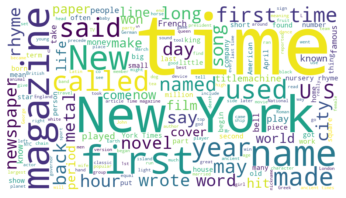

Topic: American Hodgepodge


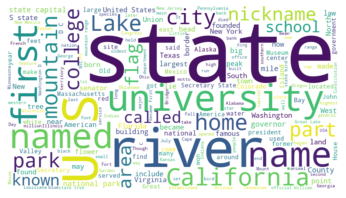

Topic: Geography


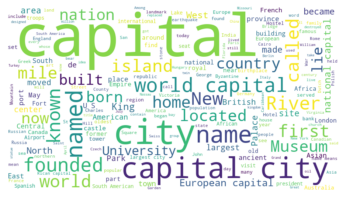

Topic: Random


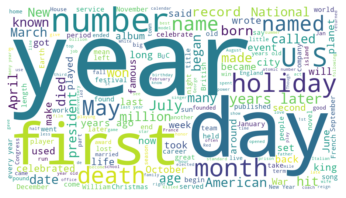

Topic: Words


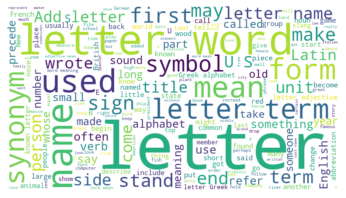

In [24]:
for topic in df.Category.unique():
    print(f'Topic: {topic}')
    create_wordcloud(df[df.Category == topic].question)